#### EDA Steps
1. Question (complete in project proposal)
2. Read in data (complete)
3. Check packaging (complete)
4. Look at the Bottom and Top of your data (looked at head and tail)
5. Check your "n"s (complete_
6. Validate with at least one external data source (complete)
7. Make a plot (complete)
8. Try the easy solution first (complete)
9. Follow up


In [204]:
# Load the necessary packages
library(tidyverse)

In [169]:
# 2. Read in data into jupyter
raw_data <- read.csv("https://github.com/SamEdwardes/ufc-data/raw/master/data.csv")

In [217]:
# 3. Check initial rows and columns ("n's"). These match what is in the csv file. 
print(nrow(raw_data))
print(ncol(raw_data))

[1] 5144
[1] 145


In [202]:
# 4. Inspect head of data to see if it reading in properly. 
head(raw_data)

R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO.TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0,...,2,0,0,8,Orthodox,162.56,162.56,135,31,32
Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0,...,0,2,0,5,Southpaw,165.10,167.64,125,32,31
Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0,...,3,6,1,14,Orthodox,180.34,193.04,155,36,35
Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0,...,1,0,0,6,Orthodox,162.56,172.72,135,26,29
Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0,...,2,0,0,3,Southpaw,187.96,190.50,264,32,26
Tatiana Suarez,Nina Ansaroff,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,False,Women's Strawweight,3,0,...,1,2,0,4,,165.10,167.64,115,33,28


In [203]:
# 4. Inspect tail of data to make sure everything is correct.
tail(raw_data)

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO.TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5139,Royce Gracie,Ken Shamrock,Joao Alberto Barreto,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0,...,0,1,0,1,Southpaw,185.42,NA,175,29,26
5140,Gerard Gordeau,Kevin Rosier,Joao Alberto Barreto,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0,...,1,0,0,1,Orthodox,195.58,NA,216,NA,34
5141,Ken Shamrock,Patrick Smith,Joao Alberto Barreto,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0,...,0,0,0,0,Orthodox,185.42,182.88,205,30,29
5142,Royce Gracie,Art Jimmerson,Joao Alberto Barreto,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0,...,0,0,0,0,Southpaw,185.42,NA,175,30,26
5143,Kevin Rosier,Zane Frazier,Joao Alberto Barreto,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0,...,0,0,0,0,Orthodox,193.04,NA,275,NA,NA
5144,Gerard Gordeau,Teila Tuli,Joao Alberto Barreto,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0,...,0,0,0,0,Orthodox,195.58,NA,216,24,34


In [215]:
# 5. Find summary statistics to see the different column descriptions & find number of NAs
summary(raw_data)

[1] 5144
[1] 145


           R_fighter               B_fighter               Referee    
 Jim Miller     :  23   Jeremy Stephens :  19   Herb Dean      : 726  
 Donald Cerrone :  22   Charles Oliveira:  17   John McCarthy  : 634  
 Demian Maia    :  21   Nik Lentz       :  14   Mario Yamasaki : 391  
 Diego Sanchez  :  21   Rafael Dos Anjos:  13   Dan Miragliotta: 347  
 Michael Bisping:  21   Tim Boetsch     :  13   Marc Goddard   : 276  
 Anderson Silva :  20   Chris Lytle     :  12   Yves Lavigne   : 259  
 (Other)        :5016   (Other)         :5056   (Other)        :2511  
         date                                 location     Winner    
 2016-11-19:  25   Las Vegas, Nevada, USA         :1216   Blue:1591  
 2014-10-04:  23   London, England, United Kingdom: 114   Draw:  83  
 2014-05-31:  22   Chicago, Illinois, USA         :  81   Red :3470  
 2014-06-28:  21   Montreal, Quebec, Canada       :  81              
 2014-08-23:  21   Atlantic City, New Jersey, USA :  80              
 1994-03-11:

> Note the data above looks good in the ranges, however, there are a lot of NAs. There are also some columns that should be removed like R_draw and B_draw which never have a value other than 0. 

>I also noticed there seem to be a lot of columns on the same statistic:
- B_avg_BODY_att
- R_avg_BODY_att
- B_avg_opp_BODY_att 
- R_avg_opp_BODY_att 

> I did a bit further digging to understand what makes them different. 

> Definitions for reference:
- _opp_ containing columns is the average of damage done by the opponent on the fighter [Source: Original Kaggle Source](https://www.kaggle.com/rajeevw/ufcdata). Therefore, it is not usually the case the R_avg_BODY_att would be reflected in B_avg_opp_BODY_att if it didn't do any damage. 

> Other definitions:
- att: attempt
- landed: attempt connected with the opponent
- kd: knockdown

In [171]:
# There are a lot of NA, so I removed NAs
na_data <- raw_data %>% 
    drop_na() 

In [214]:
# 5. Check n's again
print(nrow(na_data))
print(ncol(na_data))

[1] 3355
[1] 145


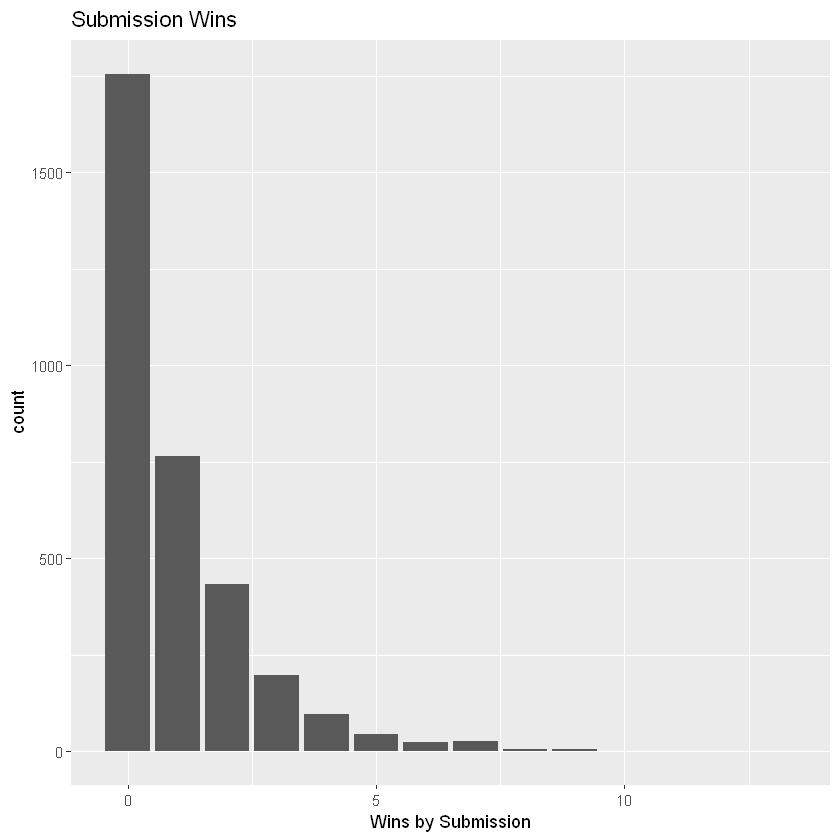

In [206]:
# 5/7. Inital graph to find out if we can use the wins column. The graph is not what I expected because it has more than 1 & 0 values. 
# This must be a life time stat instead of a match stat.
na_data %>%
    ggplot(aes(na_data$R_win_by_Submission)) +
    geom_bar() +
    labs(title="Submission Wins", x = "Wins by Submission")

In [173]:
# We need the 'win by' column from the read_fight data because our current win data doesn't have this column to answer our research question
# as we need to filter by the fights that went to judges' decision.

# import the new data file from the same source as our original
read_fight <- read.csv("https://raw.githubusercontent.com/SamEdwardes/ufc-data/master/raw_total_fight_data.csv", 
                       header = TRUE, sep = ";") %>% 
        select("R_fighter", "B_fighter", "win_by")

# merge together the old and new dataframes
merge_data <- merge(x = na_data, y = read_fight, by = c("R_fighter", "B_fighter"), all.x = TRUE)

# new summary data
summary(merge_data)

             R_fighter               B_fighter               Referee    
 Anderson Silva   :  23   Charles Oliveira:  20   Herb Dean      : 542  
 Frankie Edgar    :  22   Jeremy Stephens :  17   John McCarthy  : 319  
 Georges St-Pierre:  22   Dan Henderson   :  15   Dan Miragliotta: 281  
 Jim Miller       :  22   BJ Penn         :  14   Mario Yamasaki : 252  
 Michael Bisping  :  20   Tito Ortiz      :  14   Marc Goddard   : 217  
 Demian Maia      :  19   Nik Lentz       :  13   Yves Lavigne   : 193  
 (Other)          :3346   (Other)         :3381   (Other)        :1670  
         date                                 location     Winner    
 2016-11-19:  19   Las Vegas, Nevada, USA         : 778   Blue:1223  
 2014-10-04:  15   London, England, United Kingdom:  81   Draw:  62  
 2016-06-04:  14   Montreal, Quebec, Canada       :  70   Red :2189  
 2018-07-28:  14   Chicago, Illinois, USA         :  69              
 2014-03-15:  13   Los Angeles, California, USA   :  65           

> Summary table looks good with the distributions, however, there are a lot of columns. We can get rid of the ones we do not need. 

In [187]:
# 5. Compare when a fighter is in the R_fighter and B_fighter columns to see are unique values for each appearence. For example, if a 
# fighter shows up in the red column for a fight they will not show up in the blue column for the same fight. 
# The conclusion is that each fight is unique. 

data %>%
    filter(R_fighter == "Zak Cummings") %>%
    select(R_avg_BODY_att)

R_avg_BODY_att
<dbl>
8.000000
7.125000
7.714286
8.900000


In [188]:
data %>%
    filter(B_fighter == "Zak Cummings") %>%
    select(B_avg_BODY_att)

B_avg_BODY_att
<dbl>
3.500000
4.250000
7.200000
8.666667
0.000000


In [226]:
# 6. Validate with at least one external data source

data %>%
    filter(R_fighter == "Aaron Phillips") %>%
    select(c(R_Stance, R_Height_cms, R_Reach_cms, R_Weight_lbs, win_by, Winner))

R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,win_by,Winner
<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
Southpaw,175.26,177.8,135,Decision - Unanimous,Blue


> Verified the Aaron Philips and Matt Hobar match happened ended in an Unanimous Decsion with Hobar winning [Source: Tapout]((https://www.tapology.com/fightcenter/bouts/146806-ufc-fight-night-49-matt-the-crowbar-hobar-vs-aaron-the-model-phillips). The characteristics for Aaron matched his profile. 

In [198]:
# removed the columns that are not important to our question and columns that have no values
data <- merge_data %>% 
    select(-c("date", "Referee", "title_bout", "weight_class", "no_of_rounds", 
              "location", "R_win_by_TKO_Doctor_Stoppage", "R_win_by_Submission", "R_win_by_KO.TKO", 
              "B_win_by_TKO_Doctor_Stoppage", "B_win_by_Submission", "B_win_by_KO.TKO", "B_draw", "R_draw"))

head(data)

R_fighter,B_fighter,Winner,B_current_lose_streak,B_current_win_streak,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,...,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,win_by
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Aaron Phillips,Matt Hobar,Blue,1,0,2.000000,1.000000,2.000,2.000000,25.00000,...,0,0,0,Southpaw,175.26,177.80,135,27,25,Decision - Unanimous
Aaron Riley,Jorge Gurgel,Red,1,0,3.833333,2.166667,13.000,7.500000,111.83333,...,0,0,0,Southpaw,172.72,175.26,155,31,27,Decision - Unanimous
Aaron Riley,Justin Salas,Blue,1,0,8.500000,7.000000,6.500,5.000000,46.50000,...,0,3,3,Southpaw,172.72,175.26,155,31,32,Decision - Split
Aaron Riley,Shane Nelson,Red,0,2,0.500000,0.500000,2.000,0.500000,7.50000,...,0,1,1,Southpaw,172.72,175.26,155,24,28,Decision - Unanimous
Aaron Simpson,Ed Herman,Red,0,1,12.000000,10.375000,8.625,5.875000,17.50000,...,0,0,1,Orthodox,182.88,185.42,170,28,35,KO/TKO
Aaron Simpson,Eric Schafer,Red,2,0,3.571429,2.428571,5.000,3.142857,27.85714,...,1,2,5,Orthodox,182.88,185.42,170,34,37,Decision - Unanimous


In [199]:
# Find the different values we need to answer the question we have. Since we are only looking at judge's choice, we can only keep decsions. 
unique(data$win_by)

[1] Decision - Unanimous    Decision - Split        KO/TKO                 
[4] Submission              Overturned              DQ                     
[7] TKO - Doctor's Stoppage Decision - Majority     Could Not Continue     
10 Levels: Could Not Continue Decision - Majority ... TKO - Doctor's Stoppage

In [200]:
# filter the data by matches that ended in a decision
data <- data %>%
    filter(win_by == "Decision - Split" | win_by ==  "Decision - Unanimous" | win_by ==  "Decision - Majority")

In [225]:
# make sure we are getting an adequate data sample.
nrow(data)

[1] 1653

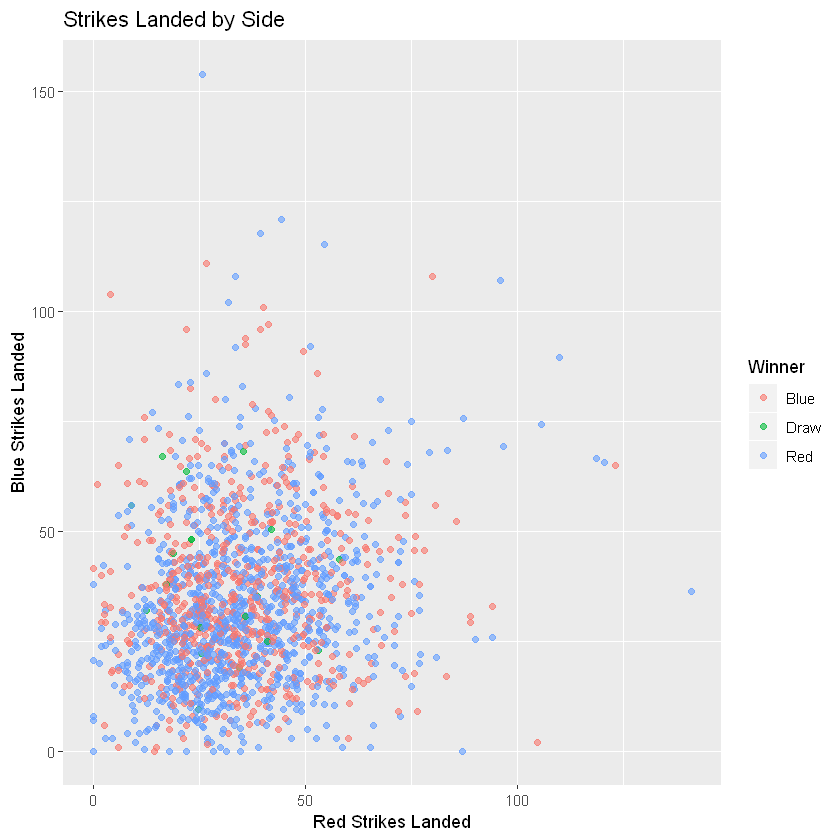

In [235]:
# 7/8 Make a plot/ easy solution
# One of the first thoughts was that strikes would decide the outcome. I plotted the number of strikes landed from Red versus Blue 
# and plotted with the colour of the winner. Surprisingly, there doesn't seem to be a correlation with the number and strikes and 
# winner. This also validates that the spread of values is reasonable for the columns. 

strike_scatterplot <- data %>% ggplot(aes(R_avg_SIG_STR_landed, B_avg_SIG_STR_landed, color=Winner)) +
    geom_point(alpha=0.6) + 
    labs(title="Strikes Landed by Side", x = "Red Strikes Landed", y = "Blue Strikes Landed")

strike_scatterplot